## COFFEE SHOPS SALES

# Exploratory Data Analysis (EDA)

According to National Coffee Association (NCA) 2023, 75% of American adults have had coffee in the past week

## Benefits of Coffee

- To improve productivity
- To reduce on lost time at work
- To help with Employee Socialization
- It creates an open office culture
- To help learn Material faster
- To improve morale

# About the Dataset
The dataset shows the Coffee Shops Sales in  New York City  for consective six months January to June 2023. It contains transaction id, transaction date, transaction time, store id (there are more than one store), store location, product id, transaction quantity, unit price,product category, product type, size, total bill, Month Name, Day Name, Hour, Month and Day of Week.

 Dataset source: https://github.com/Ayushi0214/Coffee-Shop-sales/blob/main/README.md 

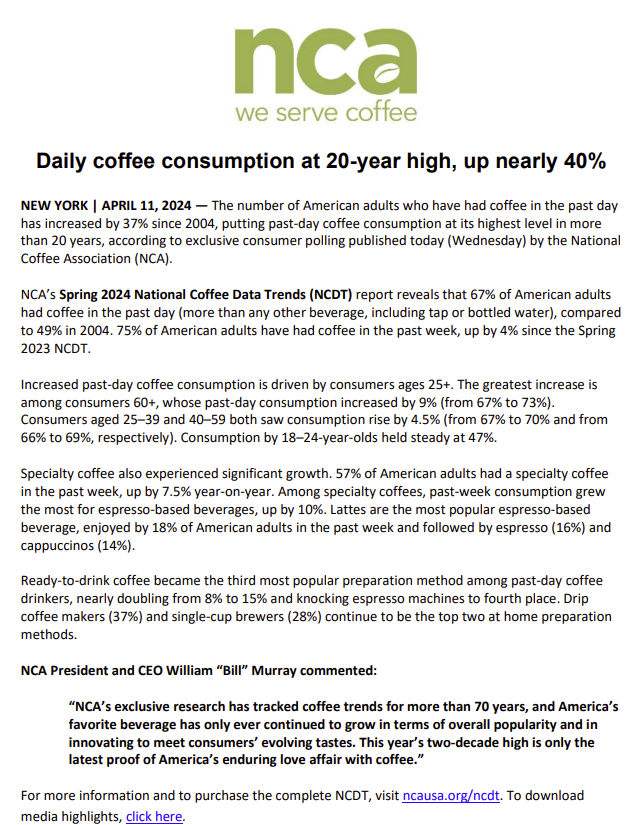 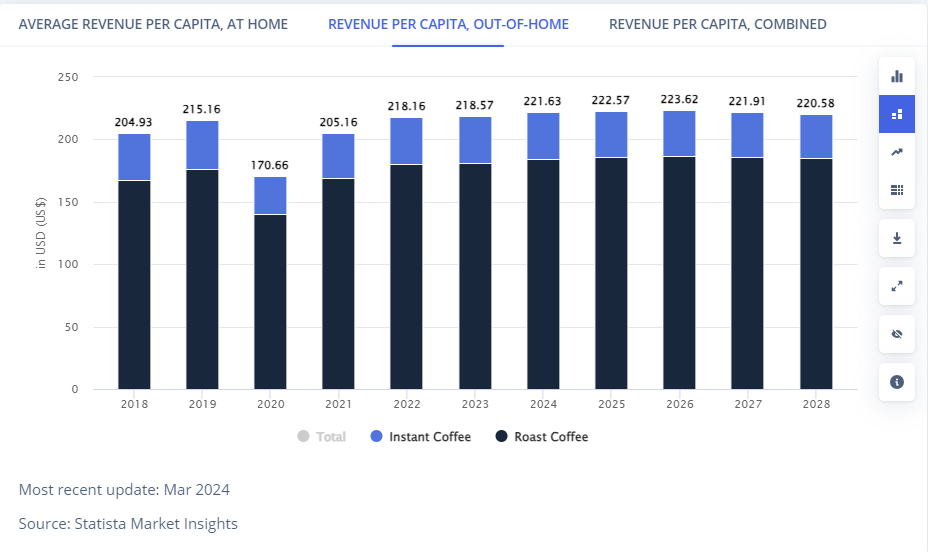  

https://www.ncausa.org/Portals/56/PDFs/Communication/Press%20Releases/Press%20release-%20Spring%202024%20NCDT.pdf                                       https://www.statista.com/outlook/cmo/hot-drinks/coffee/united-states#revenue

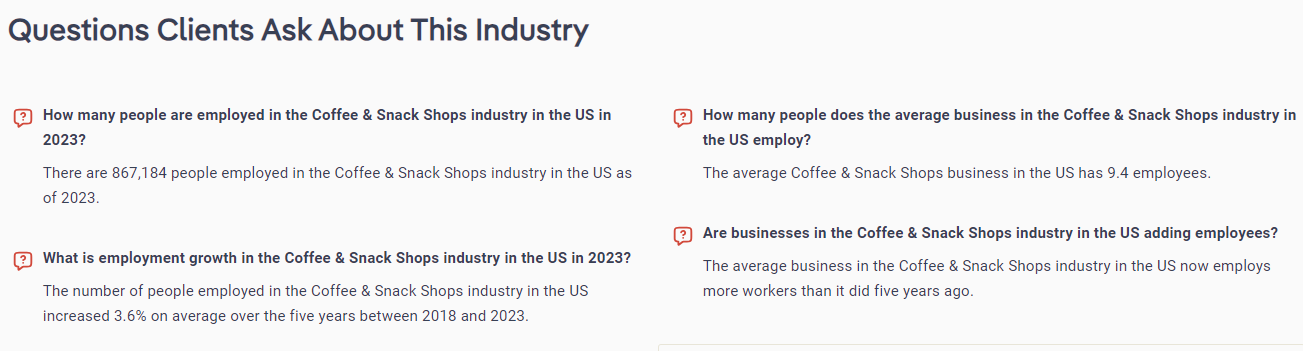

https://www.ibisworld.com/industry-statistics/employment/coffee-snack-shops-united-states/

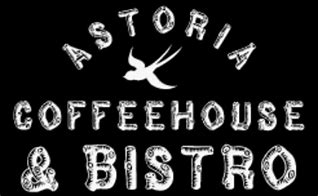    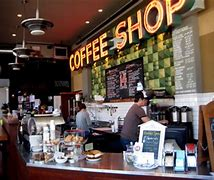    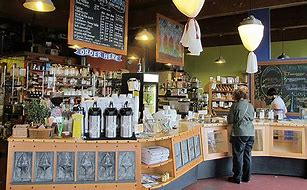 

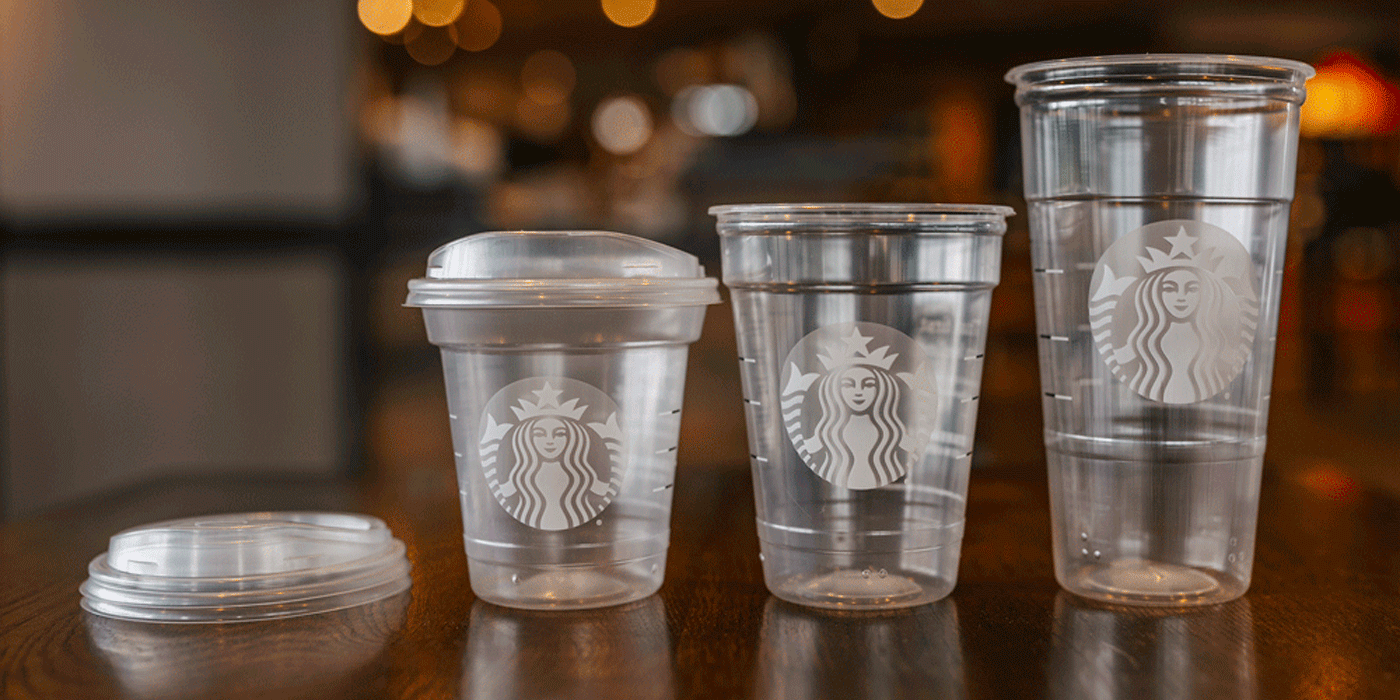     https://stories.starbucks.com/stories/2024/new-more-sustainable-starbucks-cold-cups-are-made-with-up-to-20-percent-less-plastic/

### Preliminary Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
# sns.set_palette("RdBU")

colors = ["#b1e7cd", "#854442","#000000","#fff4e6","#3c2f2f","#be9b7b","#45B39D","#AAB7B8","#20B2AA","#FF69B4","#00CED1","#FF7F50","#FFF00","DA70D6"]

In [2]:
df = pd.read_csv("C:\\Users\\bukep\\Desktop\\Data_Science\\Coffee Shops Sales in New York Analysis & Machine Learning\\data\\Coffee-shop-sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

The dataset has 149116 rows and 18 columns

In [121]:
df.columns.tolist()

['transaction_id',
 'transaction_date',
 'transaction_time',
 'transaction_qty',
 'store_id',
 'store_location',
 'product_id',
 'unit_price',
 'product_category',
 'product_type',
 'product_detail']

In [120]:
df.head

<bound method NDFrame.head of         transaction_id transaction_date transaction_time  transaction_qty  \
0                    1         1/1/2023          7:06:11                2   
1                    1         1/1/2023          7:06:11                1   
2                    2         1/1/2023          7:08:56                1   
3                    2         1/1/2023          7:08:56                2   
4                    3         1/1/2023          7:14:04                1   
...                ...              ...              ...              ...   
214465          149453        6/30/2023         20:25:10                2   
214466          149454        6/30/2023         20:31:34                1   
214467          149455        6/30/2023         20:57:19                1   
214468          149456        6/30/2023         20:57:19                2   
214469          149456        6/30/2023         20:57:19                1   

        store_id   store_location  product_id

In [119]:
df.describe(include='all')

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
count,214470.000000,214470,214470,214470.000000,214470.000000,214470,214470.000000,214470.000000,214470,214470,214470
unique,NaN,181,25762,NaN,NaN,3,NaN,NaN,9,29,80
top,NaN,6/27/2023,8:19:08,NaN,NaN,Lower Manhattan,NaN,NaN,Coffee,Brewed Chai tea,Earl Grey Rg
freq,NaN,1962,61,NaN,NaN,71742,NaN,NaN,89250,26250,4708
mean,74904.217284,NaN,NaN,1.304723,5.341442,NaN,46.733352,3.258322,NaN,NaN,NaN
std,43197.304309,NaN,NaN,0.495305,2.053735,NaN,17.003497,2.400119,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.000000,3.000000,NaN,1.000000,0.800000,NaN,NaN,NaN
25%,37354.250000,NaN,NaN,1.000000,3.000000,NaN,33.000000,2.500000,NaN,NaN,NaN
50%,74997.000000,NaN,NaN,1.000000,5.000000,NaN,46.000000,3.000000,NaN,NaN,NaN
75%,112172.750000,NaN,NaN,2.000000,8.000000,NaN,58.000000,3.500000,NaN,NaN,NaN


In [118]:
df.fillna(0)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,1,1/1/2023,7:06:11,1,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2,1/1/2023,7:08:56,1,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
4,3,1/1/2023,7:14:04,1,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
...,...,...,...,...,...,...,...,...,...,...,...
214465,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
214466,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
214467,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
214468,149456,6/30/2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [117]:
df.describe().round(2)

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,214470.00,214470.0,214470.00,214470.00,214470.00
mean,74904.22,1.3,5.34,46.73,3.26
std,43197.30,0.5,2.05,17.00,2.40
min,1.00,1.0,3.00,1.00,0.80
25%,37354.25,1.0,3.00,33.00,2.50
50%,74997.00,1.0,5.00,46.00,3.00
75%,112172.75,2.0,8.00,58.00,3.50
max,149456.00,8.0,8.00,87.00,45.00


How do sales vary by day of the week and hour of the day? 

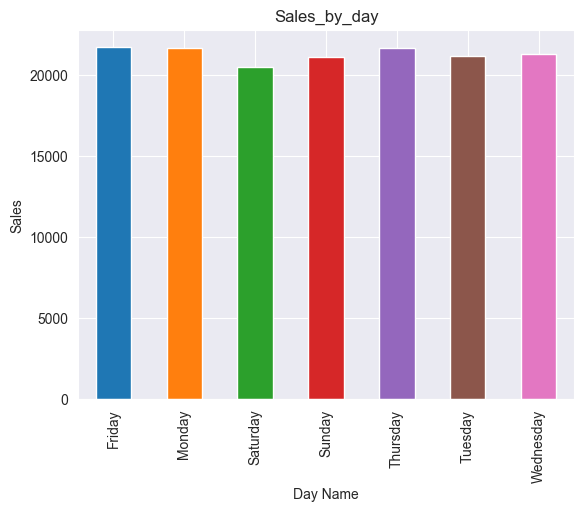

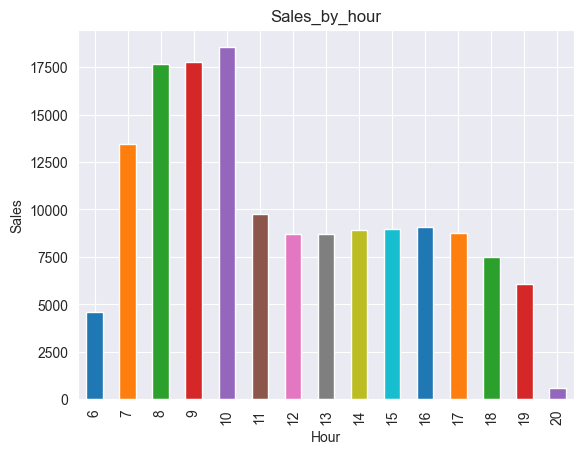

In [131]:
# Group by day of the week and hour
sales_by_day = df.groupby('Day Name').size()
sales_by_hour = df.groupby('Hour').size()
# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Plotting
sales_by_day.plot(kind='bar', title='Sales_by_day', color=colors)
plt.ylabel('Sales')
plt.show()

sales_by_hour.plot(kind='bar', title='Sales_by_hour',color=colors)
plt.ylabel('Sales')
plt.show()

Are there any peak times for sales activity?

Plot of sales by hour indicates peak times of sales with significant counts between 8am to 10 am. 

What is the total sales revenue for each month?

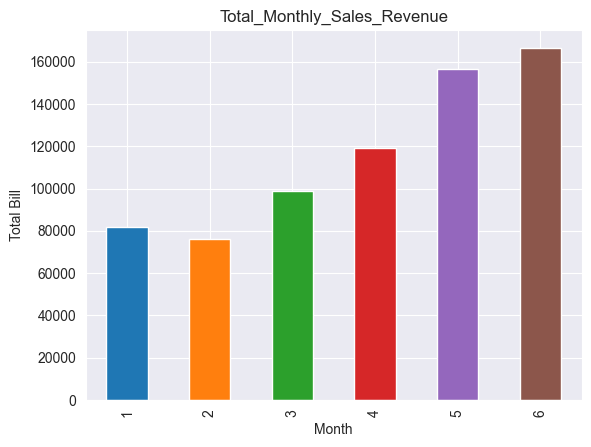

In [44]:
monthly_revenue = df.groupby('Month')['Total_Bill'].sum()
# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
monthly_revenue.plot(kind='bar', title='Total_Monthly_Sales_Revenue', color=colors)
plt.ylabel('Total Bill')
plt.show()


How do sales vary across different store locations?

In [ ]:
sales_by_location = df.groupby('store_location').sum()
sales_by_location.plot(kind='bar', title='Sales by Location')
plt.show()

what is the average price/order per person?

In [48]:
# Considering the transaction_id to calculate the average price per order.
average_price_per_order = df.groupby('transaction_id')['Total_Bill'].mean()
print("Average price per order:", average_price_per_order.mean())

Average price per order: 4.686367190643527


Which products are the best- selling in terms of quantity and revenue?

In [53]:
best_selling_qty = df.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)
print(best_selling_qty.head())

product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Name: transaction_qty, dtype: int64


In [54]:
# Best-selling by revenue
product_revenue = df.groupby('product_category')['Total_Bill'].sum().sort_values(ascending=False)
print(product_revenue.head())

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Name: Total_Bill, dtype: float64


Top 5 Best-Selling Product Types

In [55]:
coffee_products = df[df['product_category'] == 'Coffee']

# Group the data by product type and count the number of transactions
product_sales = coffee_products.groupby('product_type')['transaction_id'].count().reset_index()

# Sort the data by the number of transactions in descending order
product_sales = product_sales.sort_values('transaction_id', ascending=False)

# Get the top 5 best-selling product types
top_5_products = product_sales.head(5)

print(top_5_products)

            product_type  transaction_id
2  Gourmet brewed coffee           16912
0       Barista Espresso           16403
3  Organic brewed coffee            8489
1            Drip coffee            8477
4  Premium brewed coffee            8135


Average Number of Transactions per Day

In [51]:
# Calculate the number of transactions per day
transactions_per_day = df.groupby(df['transaction_date'].dt.date)['transaction_id'].count()

# Calculate the average number of transactions per day
avg_transactions_per_day = transactions_per_day.mean()

print(f"Average number of transactions per day: {avg_transactions_per_day:.2f}")

Average number of transactions per day: 823.85


How do sales vary by product category?

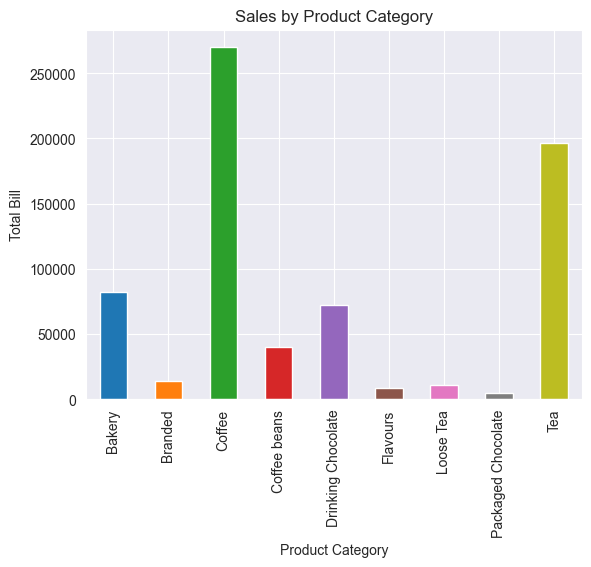

In [43]:
sales_by_category = df.groupby('product_category')['Total_Bill'].sum()
# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sales_by_category.plot(kind='bar', title='Sales by Product Category', color=colors)
plt.xlabel('Product Category')
plt.ylabel('Total Bill')
plt.show()

<Figure size 1200x600 with 0 Axes>

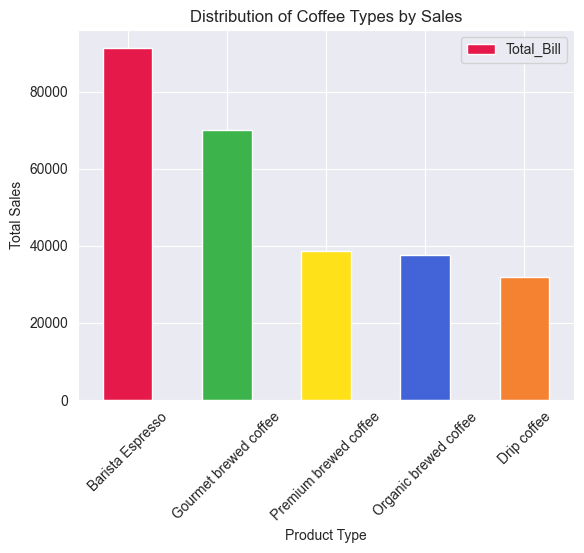

In [70]:
coffee_products = df[df['product_category'] == 'Coffee']

# Group the data by product type and sum the total sales
product_sales = coffee_products.groupby('product_type')['Total_Bill'].sum().reset_index()

# Sort the data by total sales in descending order
product_sales = product_sales.sort_values('Total_Bill', ascending=False)

# Get the top 5 product types
top_5_products = product_sales.head(5)

# Assign unique colors to the top 5 product types
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Create the bar graph
plt.figure(figsize=(12, 6))
top_5_products.plot(kind='bar', x='product_type', y='Total_Bill', color=colors)

# Add labels and title
plt.title('Distribution of Coffee Types by Sales')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()

### Pie Chart: Product Category Distribution

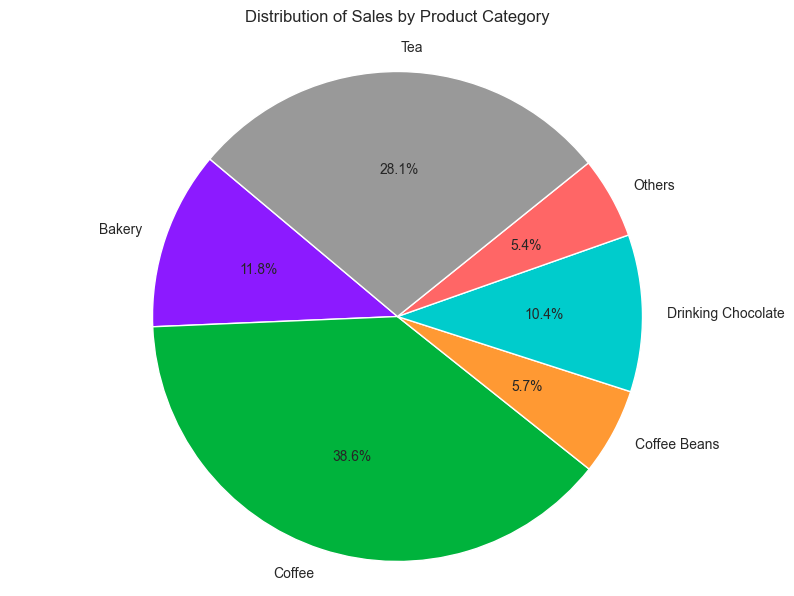

In [69]:
category_data = df.groupby('product_category')['Total_Bill'].sum().reset_index()

# Create a new 'product_category' column with the desired grouping
category_data['product_category'] = category_data['product_category'].apply(
    lambda x: 'Bakery' if x == 'Bakery' else
              'Coffee' if x == 'Coffee' else
              'Tea' if x == 'Tea' else
              'Drinking Chocolate' if x == 'Drinking Chocolate' else
              'Coffee Beans' if x == 'Coffee beans' else
              'Others')

# Group the data by the new 'product_category' column and sum the 'Total_Bill'
category_data = category_data.groupby('product_category')['Total_Bill'].sum()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_data, labels=category_data.index, autopct='%1.1f%%', startangle=140, colors=['#8c1aff', '#00b33c', '#ff9933', '#00cccc', '#ff6666', '#999999'])
plt.title('Distribution of Sales by Product Category\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.show()

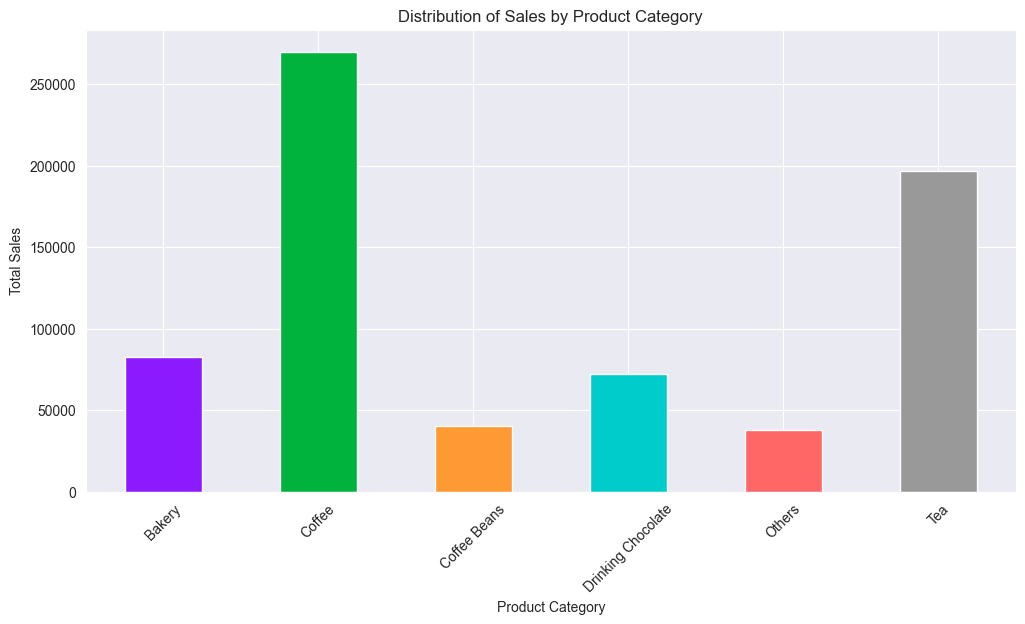

In [67]:
category_data = df.groupby('product_category')['Total_Bill'].sum().reset_index()

# Create a new 'product_category' column with the desired grouping
category_data['product_category'] = category_data['product_category'].apply(
    lambda x: 'Bakery' if x == 'Bakery' else
              'Coffee' if x == 'Coffee' else
              'Tea' if x == 'Tea' else
              'Drinking Chocolate' if x == 'Drinking Chocolate' else
              'Coffee Beans' if x == 'Coffee beans' else
              'Others')

# Group the data by the new 'product_category' column and sum the 'Total_Bill'
category_data = category_data.groupby('product_category')['Total_Bill'].sum()

# Create the bar graph
plt.figure(figsize=(12, 6))
category_data.plot(kind='bar', color=['#8c1aff', '#00b33c', '#ff9933', '#00cccc', '#ff6666', '#999999'])

# Add labels and title
plt.title('Distribution of Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()

This visualization shows which product categories are generating the most revenue. Larger slices indicate a higher contribution to total sales.

## HeatMap

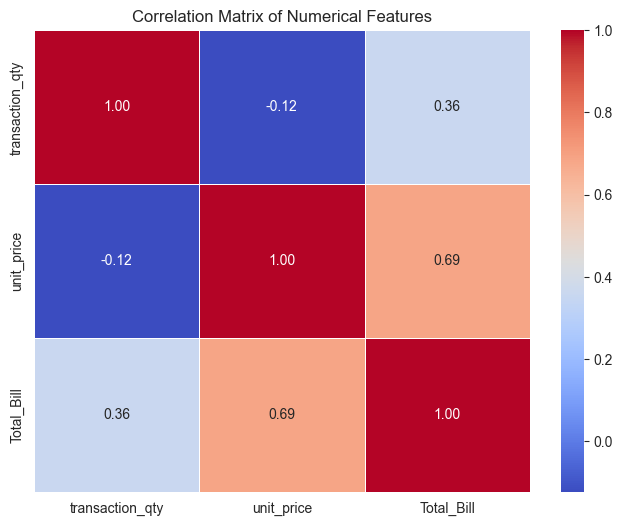

,transaction_qty,unit_price,Total_Bill
transaction_qty,1.000000,-0.123546,0.356231
unit_price,-0.123546,1.000000,0.685550
Total_Bill,0.356231,0.685550,1.000000


In [35]:
# Selecting numerical features for correlation matrix
numerical_features = df[['transaction_qty','unit_price','Total_Bill']]
correlation_matrix = numerical_features.corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

correlation_matrix

The heatmap provides an insightful correlation between transaction  quantity, unit price and total bill with a moderate positive correlation (0.686) between unit price and total bill implying that higher priced items attribute to the total bill. Also transaction quantity and total bill show a weak positive correlation (0.356) meaning  total bill is affected by quantity of items but not as strong as unit price. 

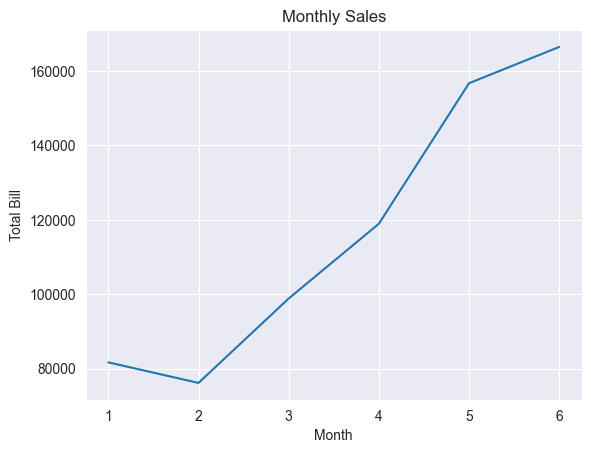

In [7]:
# Trend analysis
monthly_sales = df.groupby('Month')['Total_Bill'].sum().reset_index()
plt.plot(monthly_sales['Month'], monthly_sales['Total_Bill'])
plt.xlabel('Month')
plt.ylabel('Total Bill')
plt.title('Monthly Sales')
plt.show()

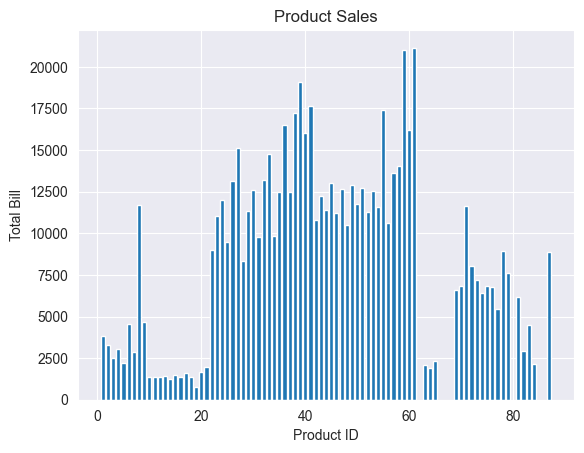

In [8]:
# Product analysis
product_sales = df.groupby('product_id')['Total_Bill'].sum().reset_index()
plt.bar(product_sales['product_id'], product_sales['Total_Bill'])
plt.xlabel('Product ID')
plt.ylabel('Total Bill')
plt.title('Product Sales')
plt.show()

In [14]:
# Daily Sales Analysis
daily_sales = df.groupby('transaction_date')['Total_Bill'].sum().reset_index()
print("Daily Sales:")
print(daily_sales.to_string(index=True))

Daily Sales:
    transaction_date  Total_Bill
0         01-01-2023     2508.20
1         01-02-2023     2466.30
2         01-03-2023     3040.25
3         01-04-2023     3699.90
4         01-05-2023     4731.45
5         01-06-2023     5227.00
6         02-01-2023     2403.35
7         02-02-2023     2506.90
8         02-03-2023     2996.05
9         02-04-2023     3575.85
10        02-05-2023     4625.50
11        02-06-2023     5056.50
12        03-01-2023     2565.00
13        03-02-2023     2591.45
14        03-03-2023     3155.15
15        03-04-2023     3604.95
16        03-05-2023     4714.60
17        03-06-2023     5166.65
18        04-01-2023     2220.10
19        04-02-2023     2551.70
20        04-03-2023     2781.90
21        04-04-2023     3327.30
22        04-05-2023     4589.70
23        04-06-2023     4985.15
24        05-01-2023     2418.85
25        05-02-2023     2304.70
26        05-03-2023     2945.30
27        05-04-2023     3552.70
28        05-05-2023     4701.

In [17]:
# Weekly Sales Analysis
# df['Week'] = df['Day of Week'].where(df['Day of Week'] != 0, df['Day of Week'] - 6) + df['Week']
weekly_sales = df.groupby('Day of Week')['Total_Bill'].sum().reset_index()
print("\nWeekly Sales:")
print(weekly_sales.to_string(index=True))


Weekly Sales:
   Day of Week  Total_Bill
0            0   101677.28
1            1    99455.94
2            2   100313.54
3            3   100767.78
4            4   101373.00
5            5    96894.48
6            6    98330.31


In [18]:
# Monthly Sales Analysis
monthly_sales = df.groupby('Month')['Total_Bill'].sum().reset_index()
print("\nMonthly Sales:")
print(monthly_sales.to_string(index=True))


Monthly Sales:
   Month  Total_Bill
0      1    81677.74
1      2    76145.19
2      3    98834.68
3      4   118941.08
4      5   156727.76
5      6   166485.88


In [19]:
# Order Traffic by Hour
order_traffic = df['Hour'].value_counts().reset_index()
order_traffic.columns = ['Hour', 'Transaction ID Count']
print("\nOrder Traffic by Hour:")
print(order_traffic.to_string(index=True))


Order Traffic by Hour:
    Hour  Transaction ID Count
0     10                 18545
1      9                 17764
2      8                 17654
3      7                 13428
4     11                  9766
5     16                  9093
6     15                  8979
7     14                  8933
8     17                  8745
9     13                  8714
10    12                  8708
11    18                  7498
12    19                  6092
13     6                  4594
14    20                   603


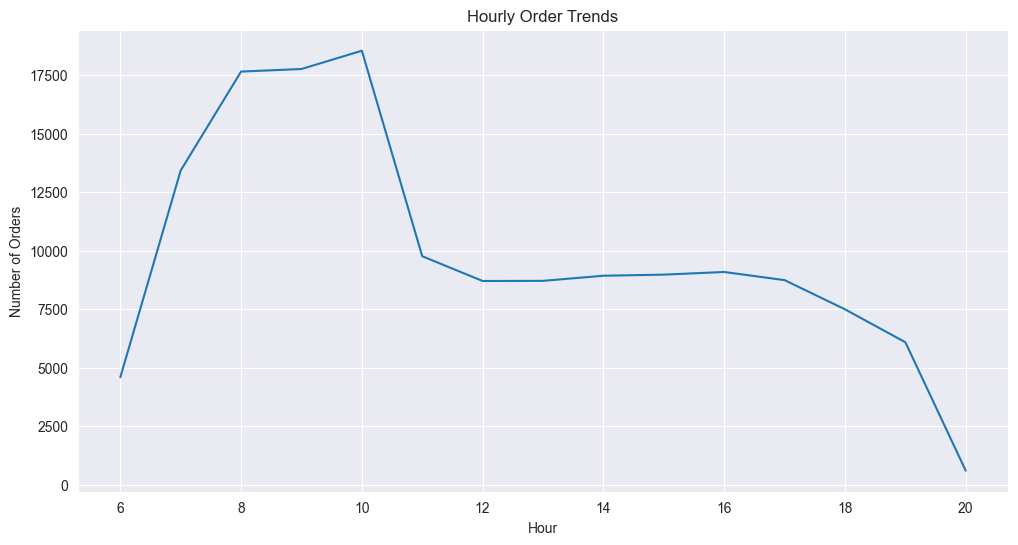

In [20]:
## Daily Order Traffic Analysis
# Hourly Order Trends
df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour
hourly_orders = df.groupby('hour')['transaction_id'].count()
hourly_orders.plot(kind='line', figsize=(12, 6))
plt.title('Hourly Order Trends')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

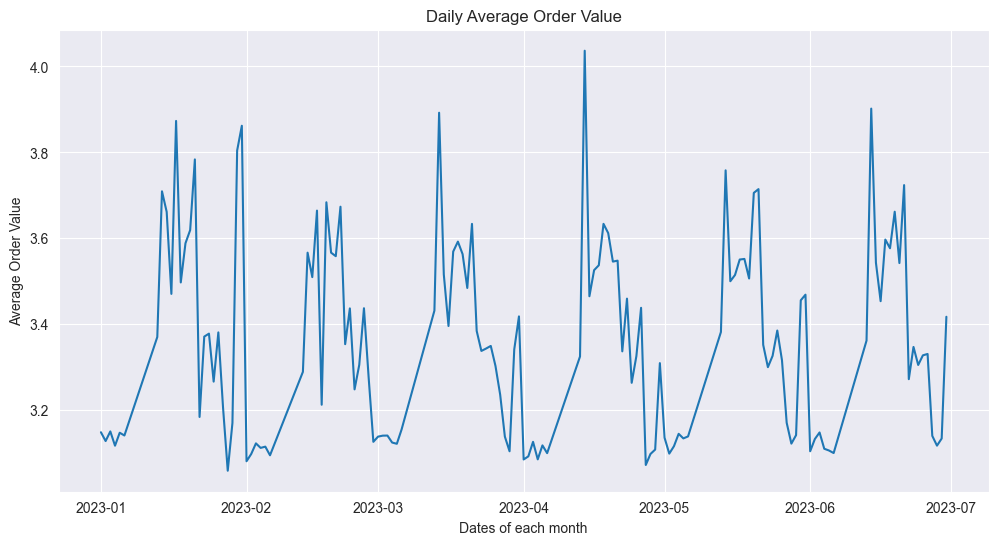

In [65]:
# Average Order Value
df['avg_order_value'] = df['Total_Bill'] / df['transaction_qty']
daily_aov = df.groupby(df['transaction_date'].dt.date)['avg_order_value'].mean()
daily_aov.plot(kind='line', figsize=(12, 6))
plt.title('Daily Average Order Value')
plt.xlabel('Dates of each month')
plt.ylabel('Average Order Value')
plt.show()

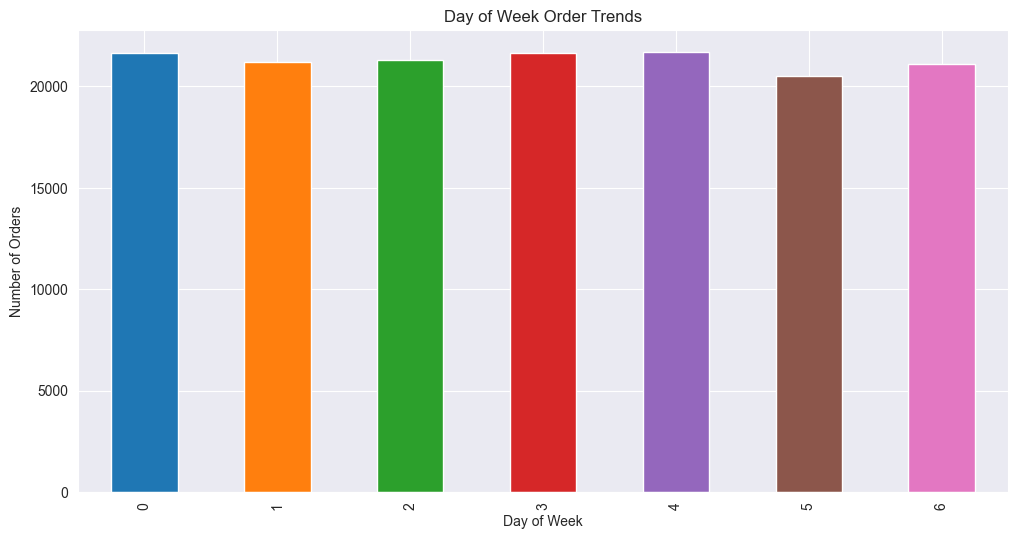

In [42]:
## Weekly Order Traffic Analysis
# Day of Week Order Trends
weekly_orders = df.groupby('Day of Week')['transaction_id'].count()
# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
weekly_orders.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Day of Week Order Trends')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

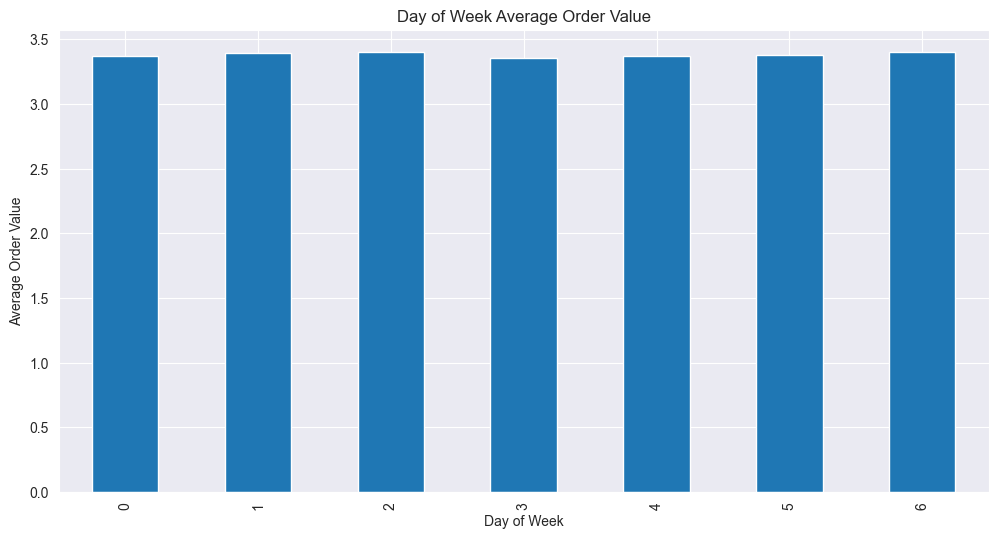

In [36]:
# Day of Week Average Order Value
weekly_aov = df.groupby('Day of Week')['avg_order_value'].mean()
weekly_aov.plot(kind='bar', figsize=(12, 6))
plt.title('Day of Week Average Order Value')
plt.xlabel('Day of Week')
plt.ylabel('Average Order Value')
plt.show()

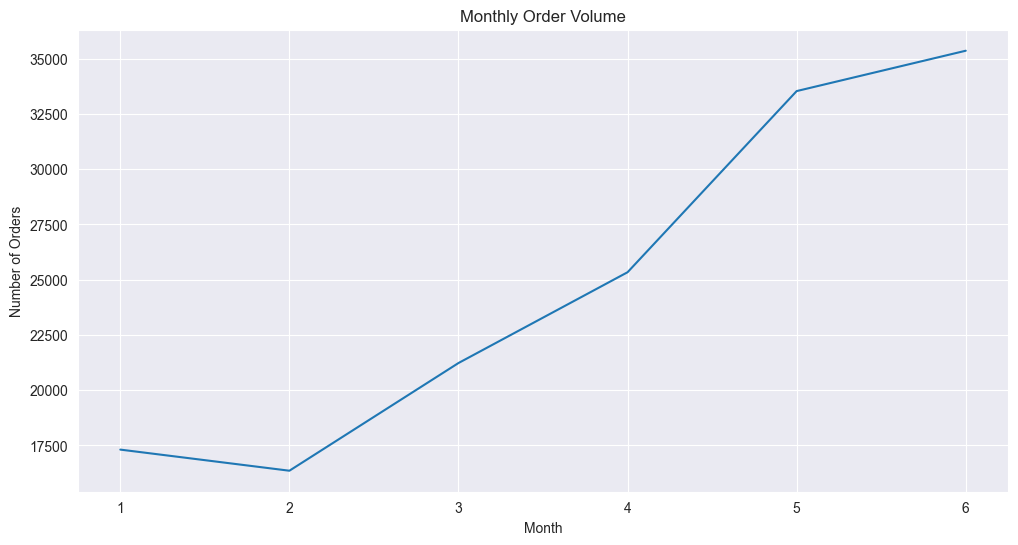

In [42]:
## Monthly Order Traffic Analysis
# Monthly Order Volume
monthly_orders = df.groupby('Month')['transaction_id'].count()
monthly_orders.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Order Volume')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

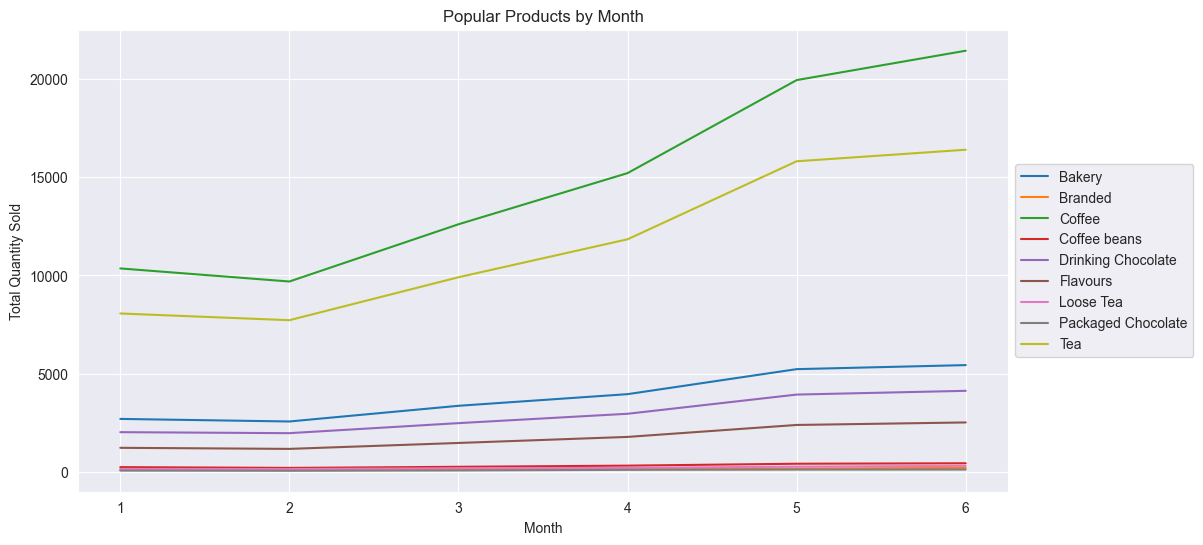

In [43]:

# Popular Products by Month
monthly_products = df.groupby(['Month', 'product_category'])['transaction_qty'].sum().unstack()
monthly_products.plot(kind='line', figsize=(12, 6))
plt.title('Popular Products by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Daily Sales Analysis

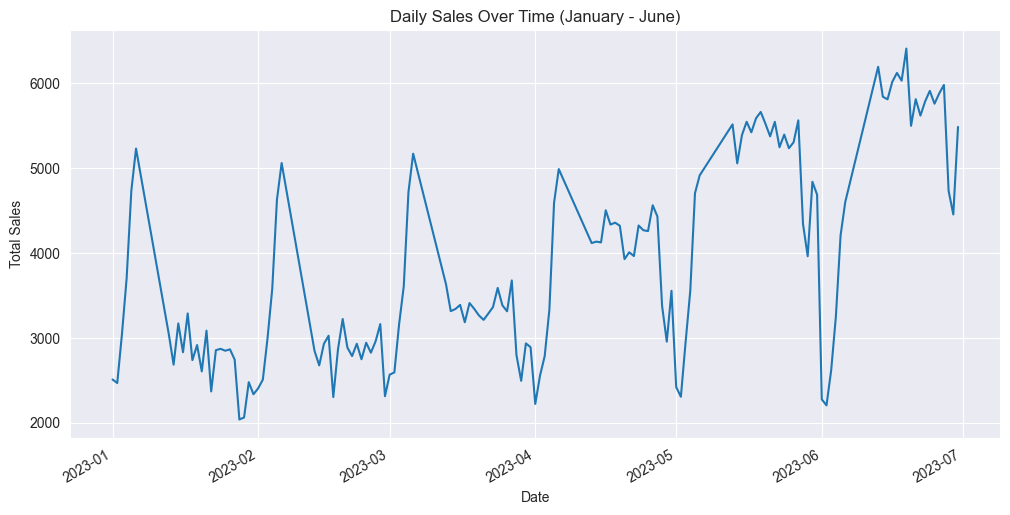

In [51]:
# Summarize daily sales
daily_sales = df.groupby(df['transaction_date'])['Total_Bill'].sum()
# Plot daily sales
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time (January - June)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Weekly and monthly sales trends

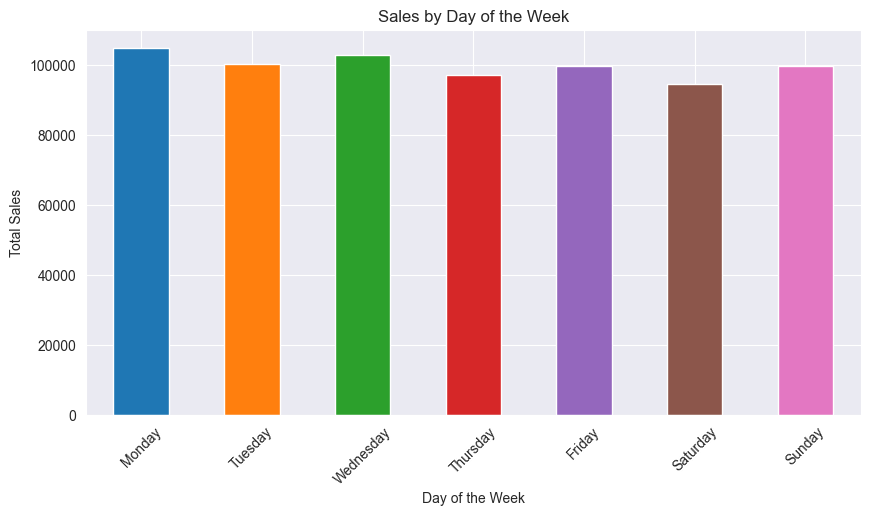

In [41]:
# Summarize weekly sales
weekly_sales = df.groupby(df['transaction_date'].dt.strftime('%A'))['Total_Bill'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot weekly sales
plt.figure(figsize=(10, 5))
weekly_sales.plot(kind='bar', color=colors)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

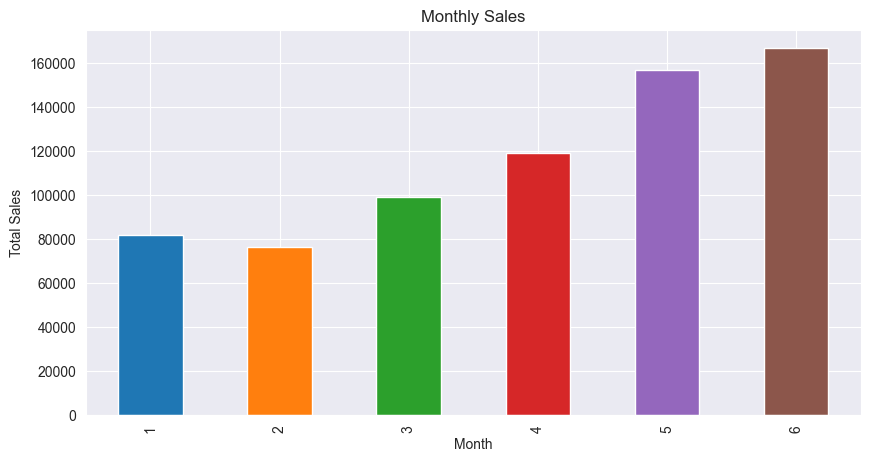

In [40]:

# Summarize monthly sales
monthly_sales = df.groupby(df['Month'])['Total_Bill'].sum()

# Creating a list of colors, one for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot monthly sales
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color=colors)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Product analysis

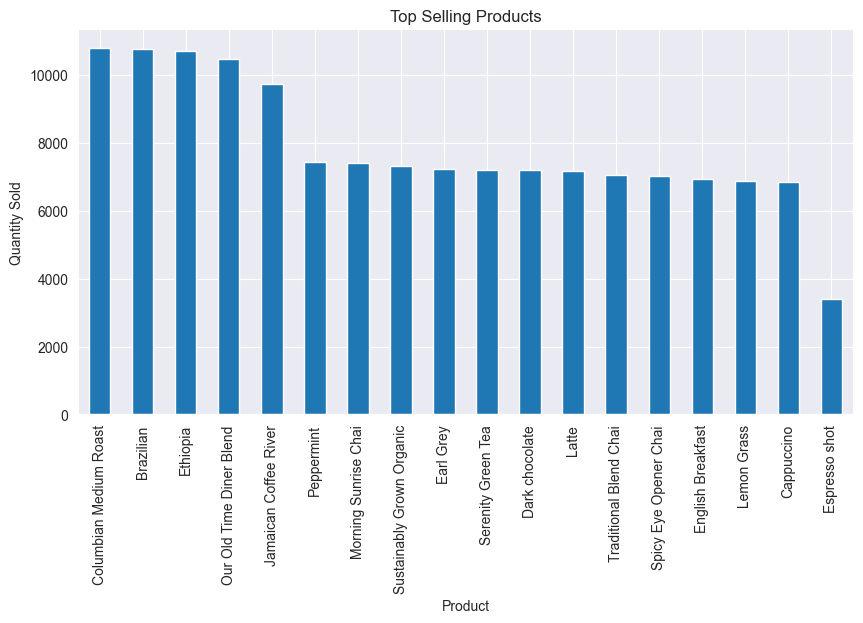

In [56]:
# Top-selling products
top_products = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False).head(18)

# Plot top-selling products
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

Sales by hour

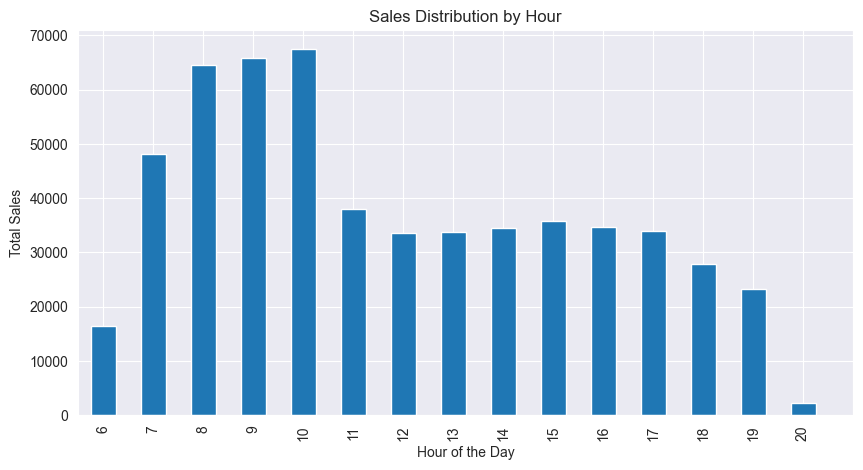

In [60]:
# Summarize sales by hour
hourly_sales = df.groupby('Hour')['Total_Bill'].sum()

# Plot sales by hour
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar')
plt.title('Sales Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(np.arange(0, 16, 1))
plt.show()


from the above coffee shop sales visualization, do 
Weekly Traffic (Different lines for each store location),
Monthly Traffic (Different lines for each store location)

Step 1: Data Preparation
First, we'll load the data using pandas and ensure that the date columns are correctly formatted as datetime objects for easy manipulation.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# Add a column for the week number and year from the transaction date for weekly grouping
df['Week'] = df['transaction_date'].dt.strftime('%Y-%U')

# Add a column for the month and year from the transaction date for monthly grouping
df['YearMonth'] = df['transaction_date'].dt.strftime('%Y-%m')


Step 3: Monthly Traffic Visualization
For monthly traffic, we'll similarly group by month and store location.

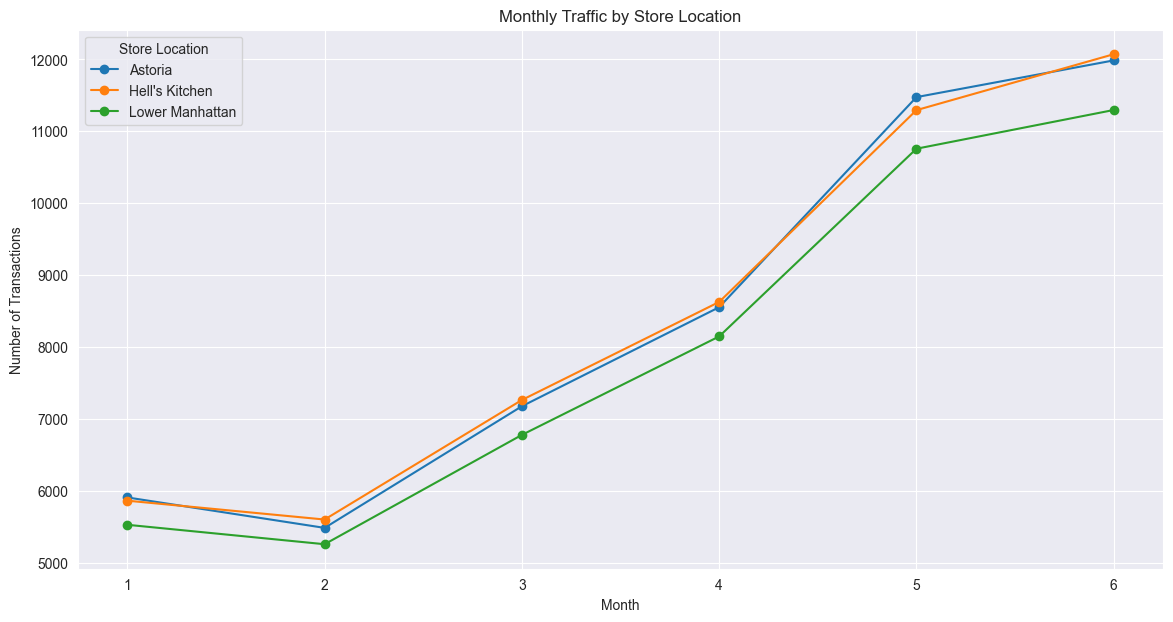

In [23]:
# Group data by YearMonth and store_location and count the number of transactions per group
monthly_traffic = df.groupby(['Month', 'store_location'])['transaction_id'].count().unstack()

# Plotting
monthly_traffic.plot(kind='line', figsize=(14, 7), marker='o', title='Monthly Traffic by Store Location')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Store Location')
plt.show()


Step 2: Weekly Traffic Visualization
To visualize weekly traffic per store location, we'll group the data by week and store location, then plot it.

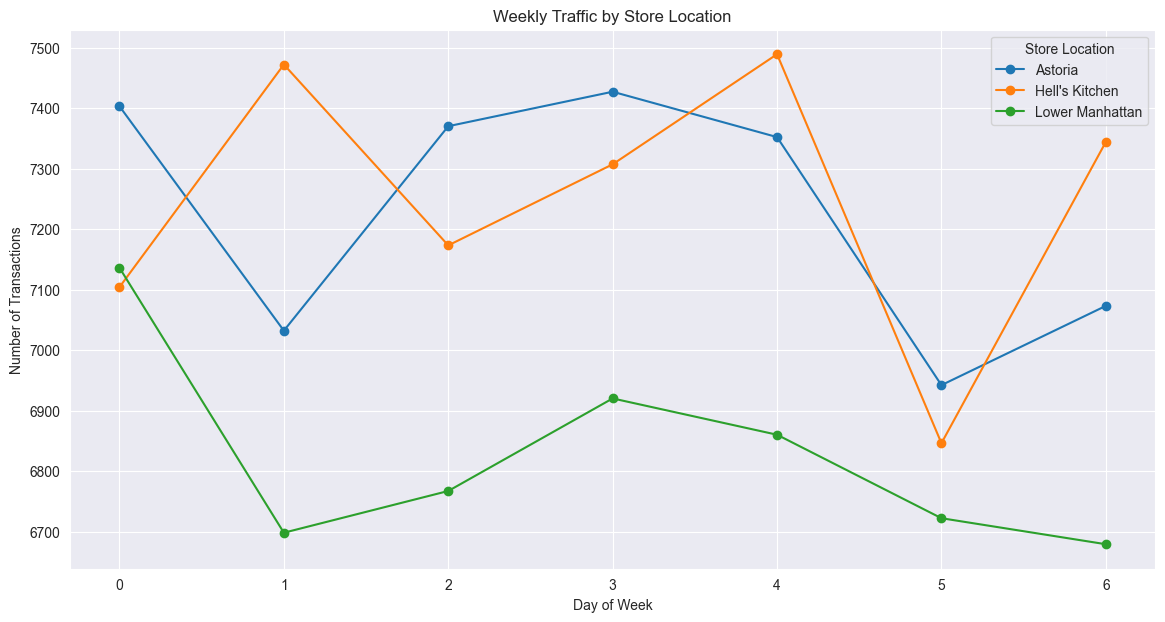

In [22]:
# Group data by Week and store_location and count the number of transactions per group
weekly_traffic = df.groupby(['Day of Week', 'store_location'])['transaction_id'].count().unstack()

# Plotting
weekly_traffic.plot(kind='line', figsize=(14, 7), marker='o', title='Weekly Traffic by Store Location')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Store Location')
plt.show()


write code interactive visualization using Plotly or Bokeh accordingly

For creating interactive visualizations for the Weekly and Monthly Traffic for each store location using Plotly, we'll first prepare the data as described earlier and then utilize Plotly's capabilities to make the charts interactive and visually appealing.

Step 1: Data Preparation
Assuming you have the data in a CSV format and have the appropriate columns, we will load and prepare the data using pandas, and create the necessary grouping for weekly and monthly traffic.

In [21]:
import pandas as pd
import plotly.express as px

# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Add week and month-year columns
df['Week'] = df['transaction_date'].dt.strftime('%Y-%U')
df['YearMonth'] = df['transaction_date'].dt.strftime('%Y-%m')


Step 2: Weekly Traffic Interactive Visualization
We'll create an interactive line chart showing weekly traffic trends for each store location.

In [20]:
# Group by week and store location, count transactions
weekly_counts = df.groupby(['Day of Week', 'store_location']).size().reset_index(name='Transactions')

# Create interactive line plot with Plotly
fig_weekly = px.line(weekly_counts, x='Day of Week', y='Transactions', color='store_location',
                     labels={'Day of Week': 'Weekly data in each month', 'Transactions': 'Number of Transactions'},
                     title='Weekly Traffic by Store Location')
fig_weekly.update_xaxes(tickangle=45)
fig_weekly.show()


Step 3: Monthly Traffic Interactive Visualization
Similarly, a plot of monthly traffic trends for each store location interactively.

In [16]:
# Group by month and store location, count transactions
monthly_counts = df.groupby(['Month', 'store_location']).size().reset_index(name='Transactions')

# Create interactive line plot with Plotly
fig_monthly = px.line(monthly_counts, x='Month', y='Transactions', color='store_location',
                      labels={'Month': 'Month of the Year', 'Transactions': 'Number of Transactions'},
                      title='Monthly Traffic by Store Location')
fig_monthly.update_xaxes(tickangle=45)
fig_monthly.show()

### 

footfall and sales over various store locations

In [7]:
store_data = df.groupby('store_location')[['transaction_qty', 'Total_Bill']].sum().reset_index()

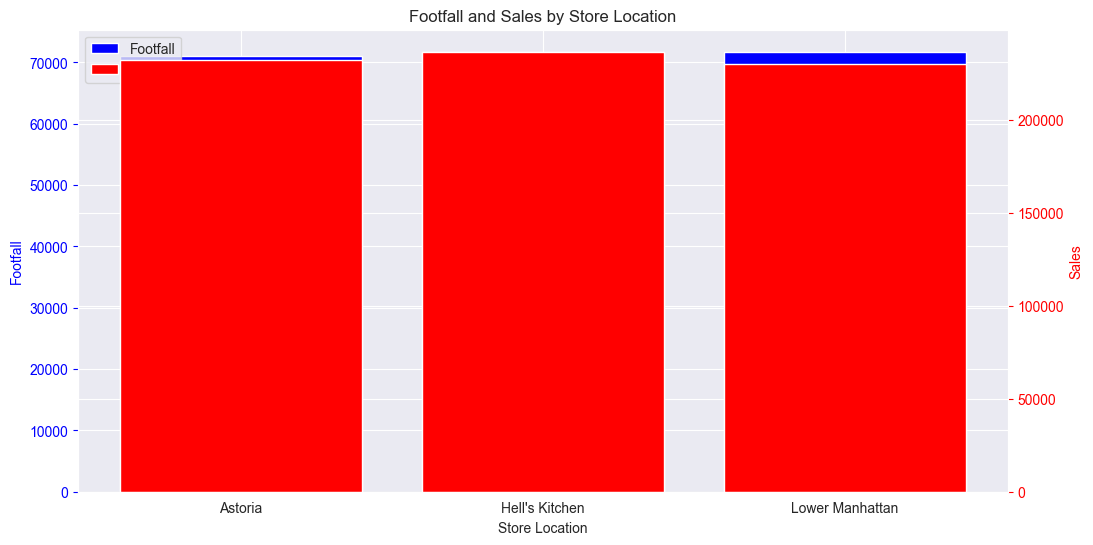

In [8]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the footfall data
ax1.bar(store_data['store_location'], store_data['transaction_qty'], color='b', label='Footfall')
ax1.set_xlabel('Store Location')
ax1.set_ylabel('Footfall', color='b')
ax1.tick_params('y', colors='b')

# Create a twin y-axis for sales
ax2 = ax1.twinx()
ax2.bar(store_data['store_location'], store_data['Total_Bill'], color='r', label='Sales')
ax2.set_ylabel('Sales', color='r')
ax2.tick_params('y', colors='r')

# Add a title and legend
plt.title('Footfall and Sales by Store Location')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

<Axes: xlabel='Month Name', ylabel='count'>

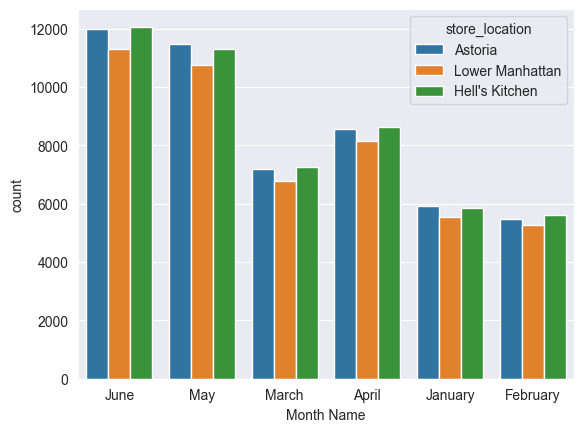

In [30]:
sns.countplot(df, x = 'Month Name', hue = 'store_location')

Text(0, 0.5, 'Total Bill')

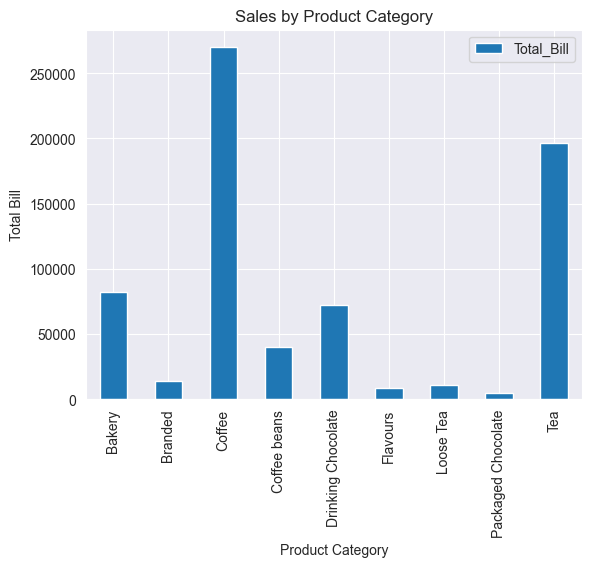

In [33]:
# Aggregating data 
df_aggregated = df.groupby('product_category')['Total_Bill'].sum().reset_index()

# Plotting the aggregated data
chart = df_aggregated.plot(kind='bar', x='product_category', y='Total_Bill')
chart.set_title('Sales by Product Category')
chart.set_xlabel('Product Category')
chart.set_ylabel('Total Bill')